In [1]:
import numpy  as np
import matplotlib.pyplot as plt
from scipy.constants import G, c, pi
from scipy.integrate import odeint

In [2]:
m_1 = 35 * 2 * 10**30
m_2 = 30 * 2 * 10**30
starting_frequency = 10
phi_0 = 0
D = 300 * 10**6 * 206265 * 149.6 * 10**9
chirp_mass = (m_1 * m_2)**(3/5) / (m_1 + m_2)**(1/5)
r_isco = 6 * G * (m_1 + m_2) / c**2
f_isco = 2 * (4 * pi**2 * r_isco**3 / (G * (m_1 + m_2)))**(-1/2)
length = 70000
fontsize = 20

# Approximation

5.253554340731882


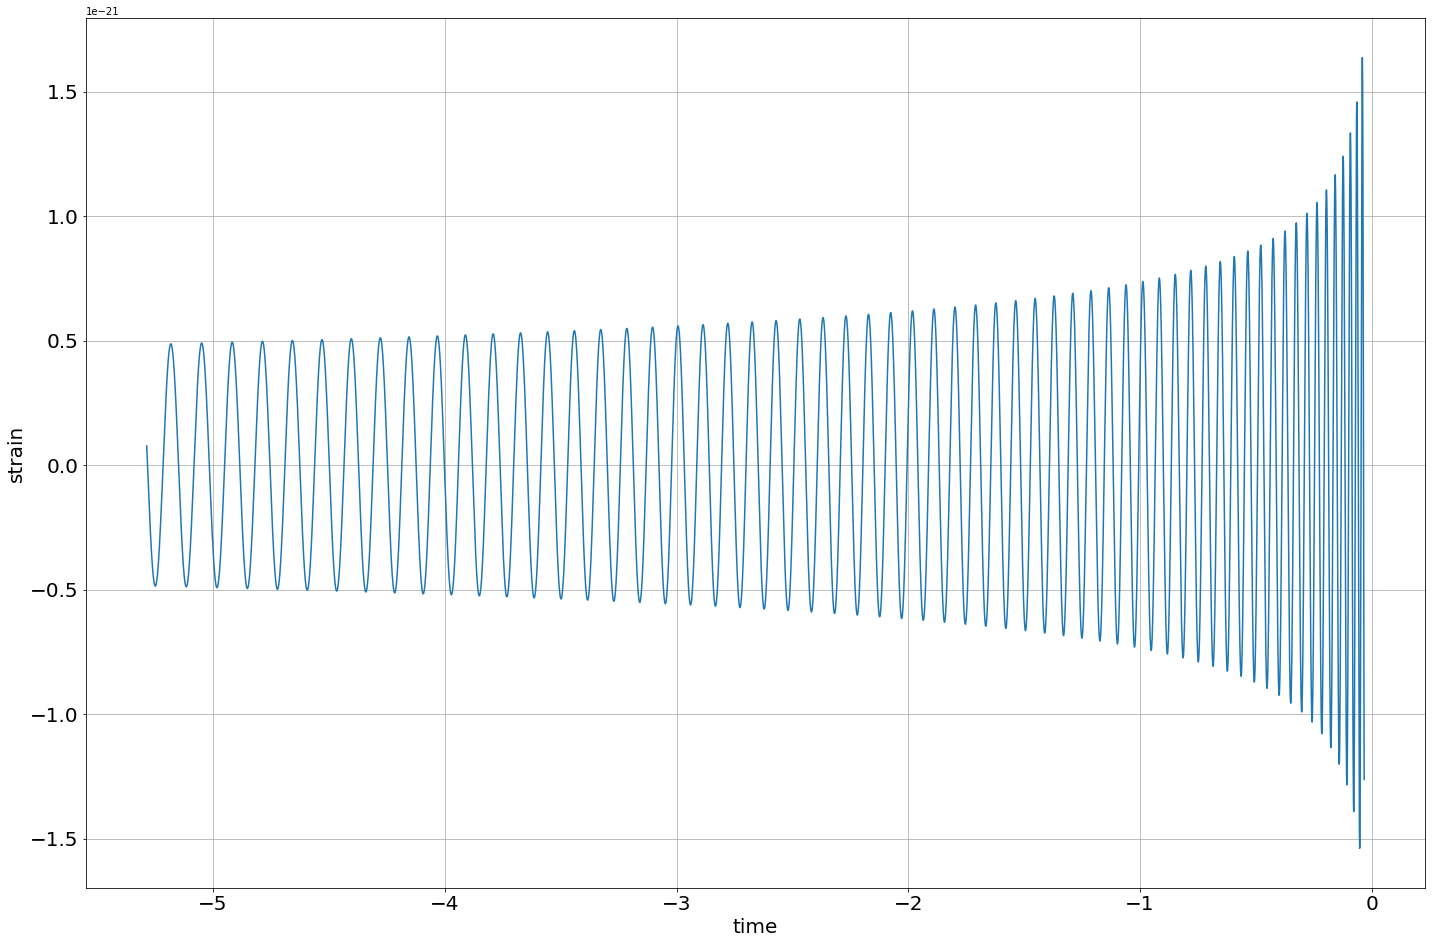

In [3]:
def f_approx (t):
    return ((8 * np.pi)**(8/3) * (G * chirp_mass / c**3)**(5/3) * (-t) / 5) ** (-3/8)

def h_0_approx (t):
    return 4 * G * chirp_mass *  (G * np.pi * f_approx(t) * chirp_mass / c**3)**(2/3) / (c**2 * D)

def derivative_f_approx (t):
    return (-3/8) * ((8 * np.pi)**(8/3) * (G * chirp_mass / c**3)**(5/3) / 5) ** (-3/8) * (-t)**(-11/8)
    
def h_approx (t):
    return h_0_approx(t) * np.cos(2 * np.pi * f_approx(t) * t + np.pi * derivative_f_approx(t) * t**2 + phi_0)

def time_approx (frequency):
    return -frequency**(-8/3) * 5 / ((8 * np.pi)**(8/3) * (G * chirp_mass / c**3)**(5/3))

starting_time_approximation = time_approx(starting_frequency)
ending_time_approximation = time_approx(f_isco)


time_approximation = np.linspace(starting_time_approximation, ending_time_approximation, length)
theoretical_strain_approximation = h_approx(time_approximation)
print(-starting_time_approximation + ending_time_approximation)

amplitude = h_0_approx(time_approximation)
frequency = f_approx(time_approximation)
fig = plt.figure(figsize=(24,16))
frame = fig.add_subplot(1,1,1)
frame.plot(time_approximation, theoretical_strain_approximation)
frame.grid(True)
frame.set_xlabel('time', fontsize = fontsize)
frame.set_ylabel('strain', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.savefig('Newtonian approximation' + str(int(m_1/2/10**30)) + str(int(m_2/2/10**30)) + '.png')

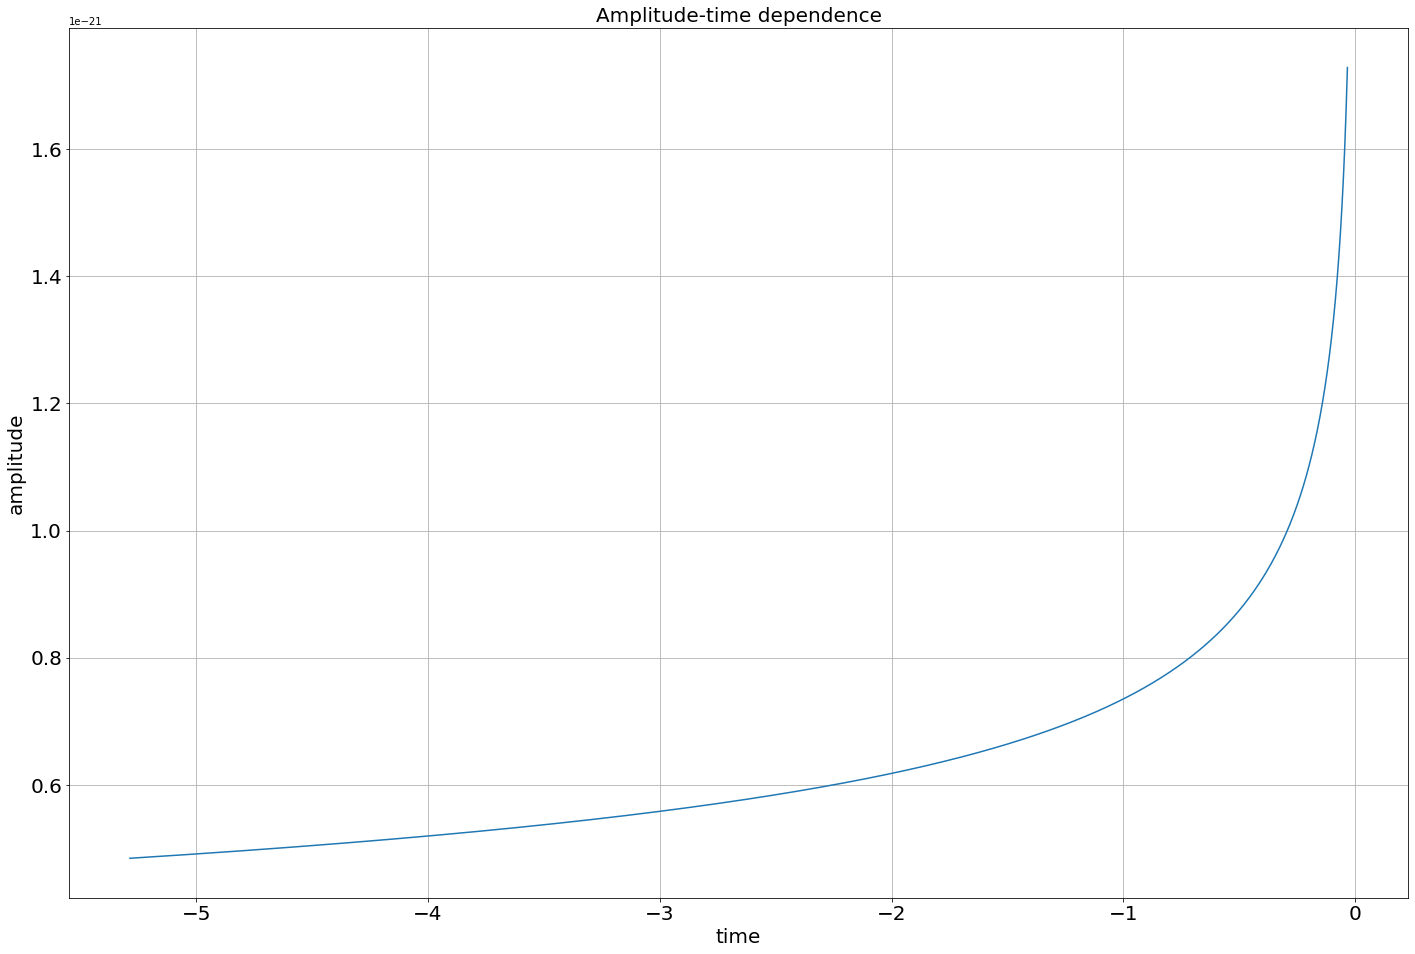

In [4]:
fig = plt.figure(figsize=(24,16))
frame = fig.add_subplot(1,1,1)
frame.plot(time_approximation, amplitude)
frame.set_title('Amplitude-time dependence', fontsize = fontsize)
frame.grid(True)
frame.set_xlabel('time', fontsize = fontsize)
frame.set_ylabel('amplitude', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.savefig('Amplitude.png')

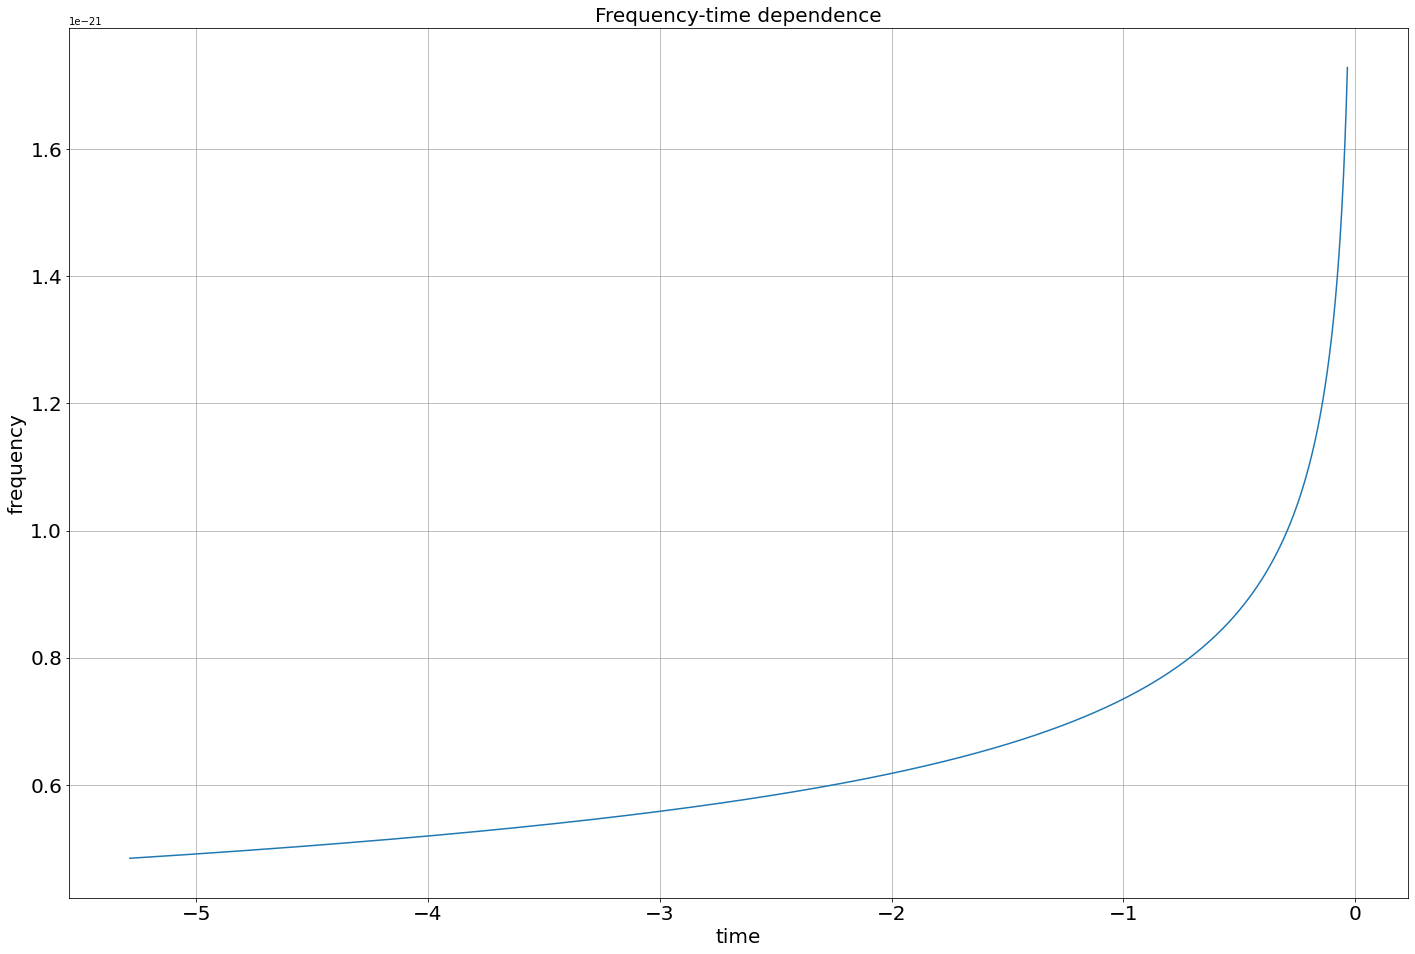

In [5]:
fig = plt.figure(figsize=(24,16))
frame = fig.add_subplot(1,1,1)
frame.plot(time_approximation, amplitude)
frame.set_title('Frequency-time dependence', fontsize = fontsize)
frame.grid(True)
frame.set_xlabel('time', fontsize = fontsize)
frame.set_ylabel('frequency', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.savefig('Frequency.png')

# PN expansion

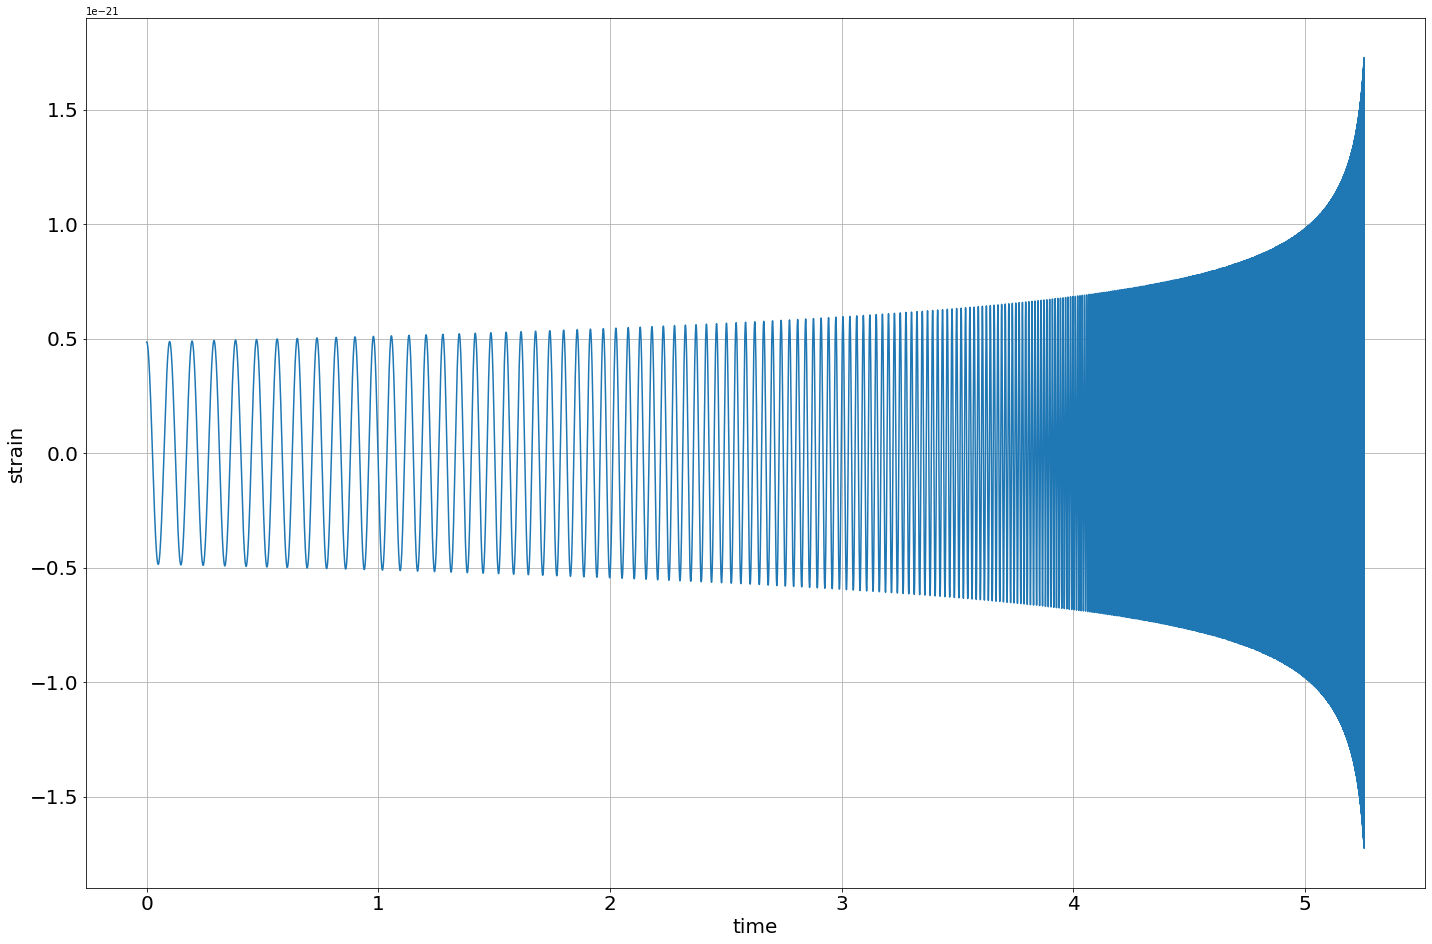

In [6]:
f_0 = starting_frequency
nu = m_1 * m_2 / (m_1 + m_2)**2
M = G * (m_1 + m_2) / c**3
chirp_mass = (m_1 * m_2)**(3/5) / (m_1 + m_2)**(1/5)
starting_time_extension = 0

tau_0 = 5 / (256 * pi * f_0 * (pi * M * f_0)**(5/3) * nu)
tau_1 = 5 * (743/336 + 11 * nu / 4) / (192 * pi * f_0**2 * pi * M * nu)
tau_1_5 = 1 / (8 * f_0 * (pi * M * f_0)**(2/3) * nu)
tau_2 = 5 * (3058673/1016064 + 5429/1008 * nu + 617/144 * nu**2) / (128 * pi * f_0 * (pi * M * f_0)**(1/3) * nu)

def derivative_f_extension (f):
    return (3 * f_0 * (f/f_0)**(11/3) / (8 * tau_0) *
            (1 - 3/4 * tau_1/tau_0 * (f/f_0)**(2/3) + 5/8 * tau_1_5/tau_0 * f/f_0 - 1/2 *
           (tau_2/tau_0 - 9/8 * (tau_1/tau_0)**2) * (f/f_0)**(4/3)))

'''def f_extension (t):
    integration = odeint(derivative_f_extension, f_0, t)
    size = np.size(t)
    res = np.empty(size)
    for i in range (size):
        res[i] = integration[i][0]
    return res'''

def time_ext (f):
    return (tau_0 * (1 - (f/f_0)**(-8/3)) + tau_1 * (1 - (f/f_0)**(-2)) 
            - tau_1_5 * (1 - (f/f_0)**(-5/3)) + tau_2 * (1 - (f/f_0)**(-4/3)) + starting_time_extension)

def h_0_extension (f):
    return 4 * G * chirp_mass *  (G * np.pi * f * chirp_mass / c**3)**(2/3) / (c**2 * D)

def h_extension (f, t):
    der_f = derivative_f_extension(f)
    return h_0_extension(f) * np.cos(2 * np.pi * f * t + np.pi * der_f * t**2 + phi_0)


frequencies = np.linspace(f_0, f_isco, length)
time_extension = time_ext(frequencies)
    

theoretical_strain_extension = h_extension(frequencies, time_extension)

fig = plt.figure(figsize=(24,16))
frame = fig.add_subplot(1,1,1)
frame.plot(time_extension, theoretical_strain_extension)
frame.grid(True)
frame.set_xlabel('time', fontsize = fontsize)
frame.set_ylabel('strain', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.savefig('PN expansion' + str(int(m_1/2/10**30)) + str(int(m_2/2/10**30)) + '.png')

# Comparison

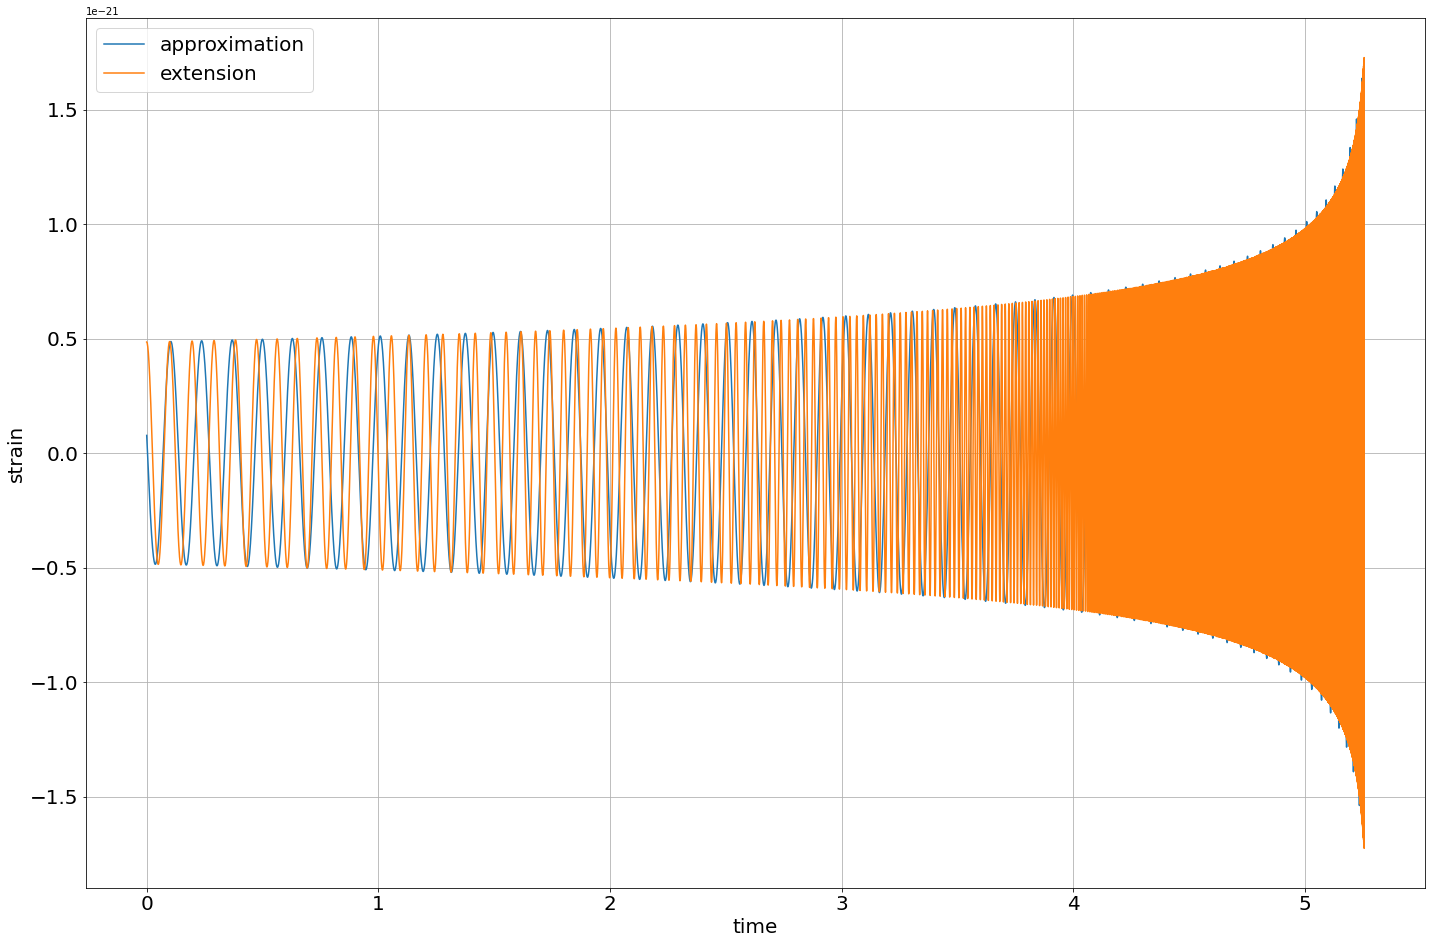

In [7]:
fig = plt.figure(figsize=(24,16))
frame = fig.add_subplot(1,1,1)
frame.plot(time_approximation - starting_time_approximation, theoretical_strain_approximation, label='approximation')
frame.plot(time_extension - starting_time_extension, theoretical_strain_extension, label='extension')
frame.grid(True)
frame.legend(fontsize = fontsize)
frame.set_xlabel('time', fontsize = fontsize)
frame.set_ylabel('strain', fontsize = fontsize)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.savefig('Comparison' + str(int(m_1/2/10**30)) + str(int(m_2/2/10**30)) + '.png')